C:\Users\sudik\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


782/782 ━━━━━━━━━━━━━━━━━━━━ 1747s 2s/step - accuracy: 0.1003 - loss: 2.3039 - val_accuracy: 0.1000 - val_loss: 2.3027
313/313 - 154s - 492ms/step - accuracy: 0.1000 - loss: 2.3027
Test accuracy: 0.10000000149011612


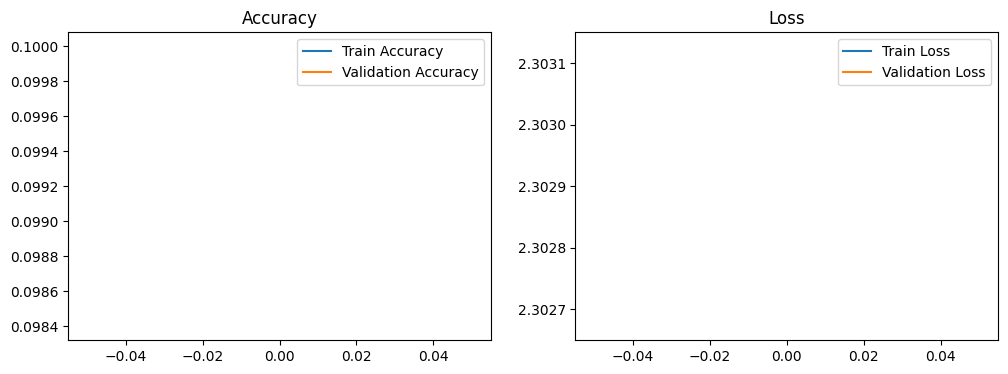

The model is a good fit.


In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import VGG16
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize the data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Create VGG16-based model
def create_vgg_base_model():
    base_model = VGG16(weights=None, include_top=False, input_shape=(32, 32, 3))
    model = models.Sequential()
    model.add(base_model)
    model.add(layers.Flatten())
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(10, activation='softmax'))

    return model

# Define a LeNet model
def create_lenet_model():
    model = models.Sequential()

    model.add(layers.Conv2D(6, (5, 5), activation='relu', input_shape=(32, 32, 3)))
    model.add(layers.AveragePooling2D((2, 2)))

    model.add(layers.Conv2D(16, (5, 5), activation='relu'))
    model.add(layers.AveragePooling2D((2, 2)))

    model.add(layers.Flatten())
    model.add(layers.Dense(120, activation='relu'))
    model.add(layers.Dense(84, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))

    return model

# Define an AlexNet model
def create_alexnet_model():
    model = models.Sequential()

    model.add(layers.Conv2D(96, (11, 11), strides=4, activation='relu', input_shape=(32, 32, 3)))
    model.add(layers.MaxPooling2D((3, 3), strides=2))

    model.add(layers.Conv2D(256, (5, 5), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((3, 3), strides=2))

    model.add(layers.Conv2D(384, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(384, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((3, 3), strides=2))

    model.add(layers.Flatten())
    model.add(layers.Dense(4096, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(4096, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(10, activation='softmax'))

    return model

# Choose a model to train
model_choice = "vgg"  # Change to "lenet" or "alexnet" as needed

if model_choice == "vgg":
    model = create_vgg_base_model()
elif model_choice == "lenet":
    model = create_lenet_model()
elif model_choice == "alexnet":
    model = create_alexnet_model()
else:
    raise ValueError("Invalid model choice. Choose 'vgg', 'lenet', or 'alexnet'.")

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Data Augmentation
data_gen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
data_gen.fit(x_train)

# Train the model
history = model.fit(data_gen.flow(x_train, y_train, batch_size=64),
                    epochs=1,
                    validation_data=(x_test, y_test),
                    verbose=1)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_accuracy}")

# Plot training and validation metrics
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()

plt.show()

# Check for overfitting or underfitting
train_accuracy = history.history['accuracy'][-1]
val_accuracy = history.history['val_accuracy'][-1]

diff = train_accuracy - val_accuracy
if diff > 0.05:
    print("The model is overfitting. Consider adding more regularization techniques or reducing model complexity.")
elif diff < -0.05:
    print("The model is underfitting. Consider increasing model complexity or training longer.")
else:
    print("The model is a good fit.")